In [ ]:
# Arnav Jain Period 1 Yilmaz ML
import random, time
import numpy as np

In [ ]:
def step(x):
  return 1 if x >= 0 else 0

In [ ]:
lr = 0.1
epochs = 10

In [ ]:
def run(X_train, y_train):
    start = time.time()
    weights = [random.random()] * len(X_train[0])
    bias = random.random()
    for epoch in range(epochs):
        for x_val, y_val in zip(X_train, y_train):
          n = bias
          for ind, i in enumerate(x_val):
            n += weights[ind] * i
          y_hat = step(n)
          error = y_val - y_hat
          for i in range(len(X_train[0])):
            weights[i] = weights[i] + error * lr * x_val[i]
          bias = bias + error * lr
    end = time.time()
    print("Training Time: ", end - start)
    return weights, bias
  
def test(X, y, model):
    weights, bias = model
    y_pred = []

    for x_val, y_val in zip(X, y):
       n = bias
       for ind, i in enumerate(x_val):
         n += weights[ind] * i
       y_hat = step(n)
       y_pred.append(y_hat)
    return y_pred



In [ ]:
def gen_points(n = 100000):
  #line: y = .5x + .5
  X, y = [], []
  for i in range(n):
    X1, X2 = random.random(), random.random()
    X.append([X1, X2])
    y_hat = .5 * X1 + .5
    if(X2 < y_hat):
      y.append(1)
    else:
      y.append(0)
  return X, y

In [ ]:
X, y = gen_points()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = run(X_train, y_train)
preds = test(X_test, y_test, model)

Training Time:  2.047403335571289


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(preds, y_test))

0.99688


In [ ]:
X_np = np.array(X_train)
y_np = np.array(y_train)
comb = np.concatenate([X_np, y_np[:, np.newaxis]], axis = 1)

In [ ]:
comb_blue = comb[comb[:, 2] == 1]
comb_red = comb[comb[:, 2] == 0]

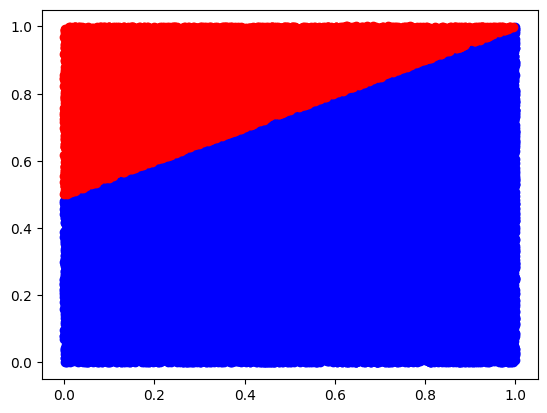

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(comb_blue[:, 0], comb_blue[:, 1], color = "blue")
plt.scatter(comb_red[:, 0], comb_red[:, 1], color = "red")

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_path = "/content/drive/MyDrive/ML/Lab 8/iris.csv"
df = pd.read_csv(iris_path)

In [ ]:
y = df['variety']
X = df.drop(['variety'], axis = 1)
y.replace(['Versicolor', 'Virginica', 'Setosa'],
                        [0, 1, 2], inplace=True)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test = X_train.to_numpy().tolist(), X_test.to_numpy().tolist()

In [ ]:
def three_step(x):
  if x < 0:
    return 0
  elif x < 1:
    return 1
  else:
    return 2

In [ ]:
def run_iris(X_train, y_train):
    start = time.time()
    weights = [random.random()] * len(X_train[0])
    bias = random.random()
    for epoch in range(epochs):
        for x_val, y_val in zip(X_train, y_train):
          n = bias
          for ind, i in enumerate(x_val):
            n += weights[ind] * i
          y_hat = three_step(n)
          error = y_val - y_hat
          for i in range(len(X_train[0])):
            weights[i] = weights[i] + error * lr * x_val[i]
          bias = bias + error * lr
    end = time.time()
    print("Training Time: ", end - start)
    return weights, bias
  
def test_iris(X, y, model):
    weights, bias = model
    y_pred = []

    for x_val, y_val in zip(X, y):
       n = bias
       for ind, i in enumerate(x_val):
         n += weights[ind] * i
       y_hat = three_step(n)
       y_pred.append(y_hat)
    return y_pred



In [ ]:

model = run_iris(X_train, y_train)
preds = test_iris(X_test, y_test, model)
print(accuracy_score(preds, y_test))

Training Time:  0.009305715560913086
0.4


In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
model = Perceptron()
model.fit(X_train, y_train)

Perceptron()

In [ ]:
preds = model.predict(X_test)
print(accuracy_score(preds, y_test))

0.5666666666666667
